In [9]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from PIL import Image


In [10]:

def power_spectrums(image_path):
    image = mpimg.imread(image_path)

    print(f"Image Path: {image_path}")
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    plt.figure(figsize=(5,5))
    plt.imshow(img_array, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    if image.ndim == 3:
        image = np.mean(image, axis=2) 
    
    npix = image.shape[0]
    
    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image)**2
    
    fourier_2d = np.fft.fftshift(fourier_amplitudes)
    
    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    
    knrm_flat = knrm.flatten()
    fourier_flat = fourier_amplitudes.flatten()
    
    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm_flat, fourier_flat,
                                         statistic="mean",
                                         bins=kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
    
    plt.figure(figsize=(8, 6))
    plt.loglog(kvals, Abins)
    plt.xlabel("$k$")
    plt.ylabel("$P(k)$")
    plt.title("Radially Averaged Power Spectrum (1D)")
    plt.grid(True, which="both")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.imshow(np.log1p(fourier_2d), cmap='inferno')
    plt.colorbar(label="log(Power)")
    plt.title("2D Power Spectrum")
    plt.axis('off')
    plt.show()

## Beach

Image Path: ./beach_01/00000001.jpg


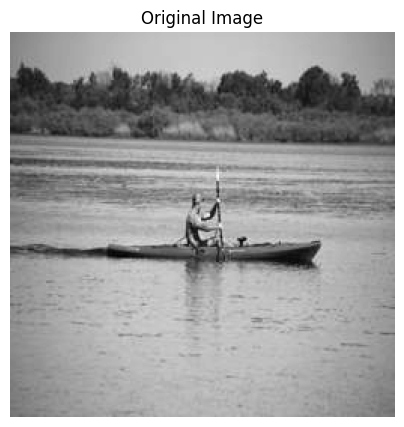

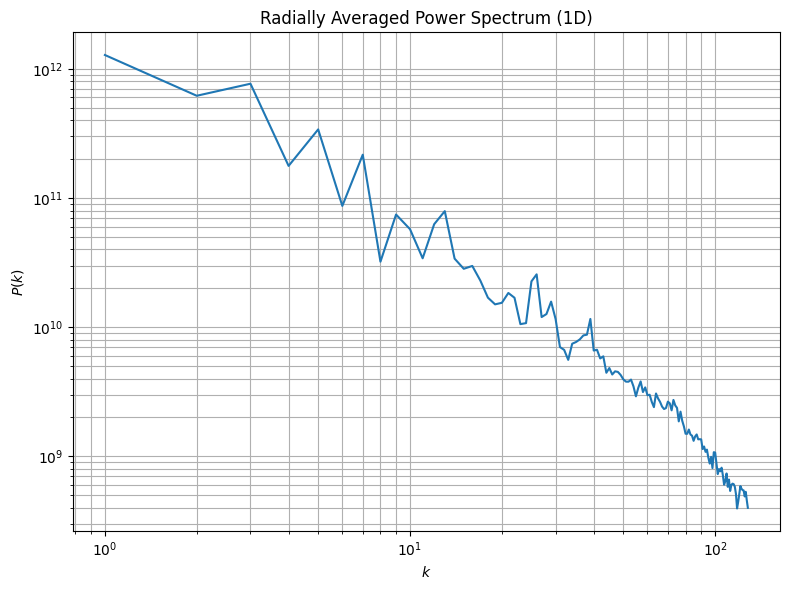

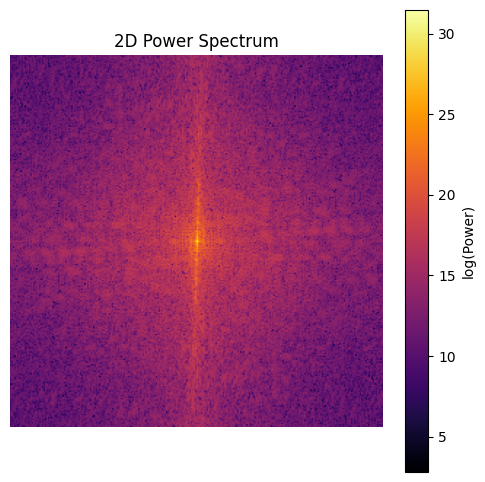

In [11]:
power_spectrums('./beach_01/00000001.jpg')

## Forest

Image Path: ./forest_03/00000003.jpg


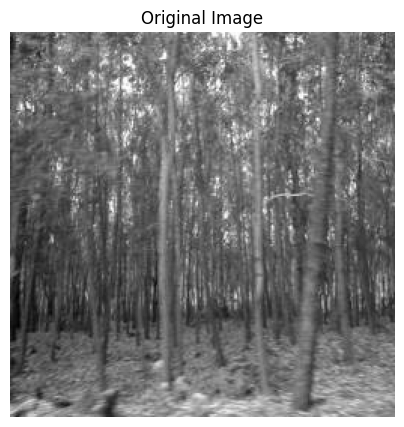

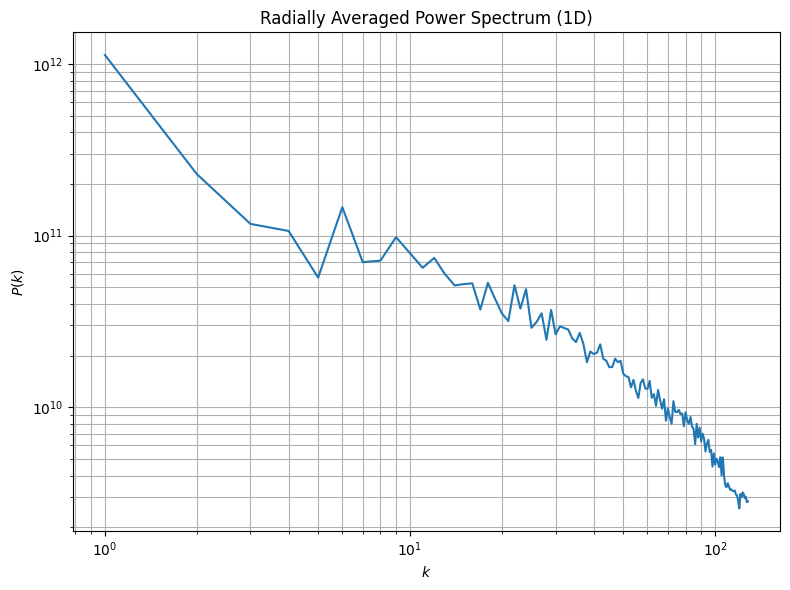

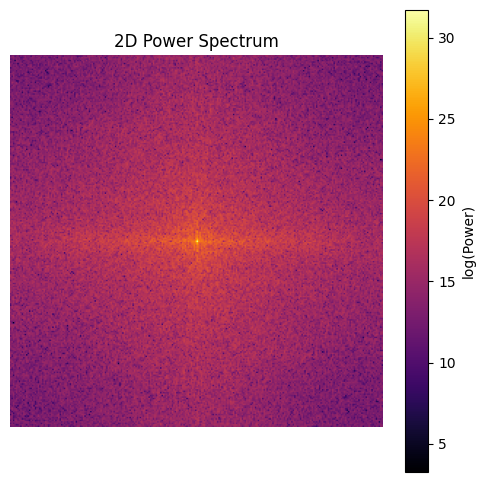

In [12]:
power_spectrums('./forest_03/00000003.jpg')